## Black Friday Sales Prediction

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

Problem: Predict purchase amount.

### Data Overview
Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

* User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
* Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
* Gender: indicates the gender of the person making the transaction.
* Age: indicates the age group of the person making the transaction.
* Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
* City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
* Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
* Marital_Status: is 0 if the user is not married and 1 otherwise.
* Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
* Purchase: Purchase amount.

# 1. import library

In [2]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# 2. data analysis

In [2]:
!wget https://raw.githubusercontent.com/dasarpai/DAI-Datasets/main/Black-Friday-Sales/black-friday-sales.zip
!unzip black-friday-sales.zip -d data

^C


In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.shape

(550068, 12)

like we c her we had 
* 550068 rows 
* 12 coluns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


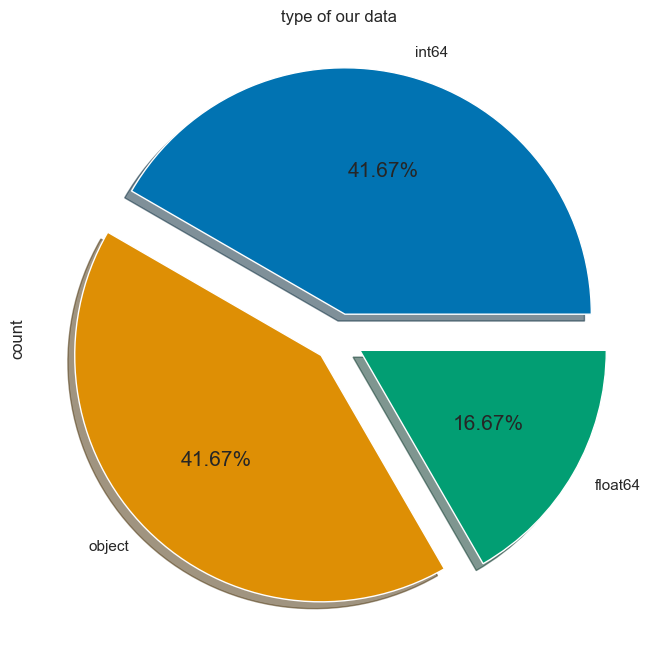

In [6]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [7]:
# show the numirical values

num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
num_columns.remove('Purchase')
num_columns.remove('User_ID')
num_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3']

In [8]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [9]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


A basic observation is that:

* Product P00265242 is the most popular product.
* Most of the transactions were made by men.
* Age group with most transactions was 26-35.
* City Category with most transactions was B

but we will cover each of these in more depth later

## finding missing values

In [10]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


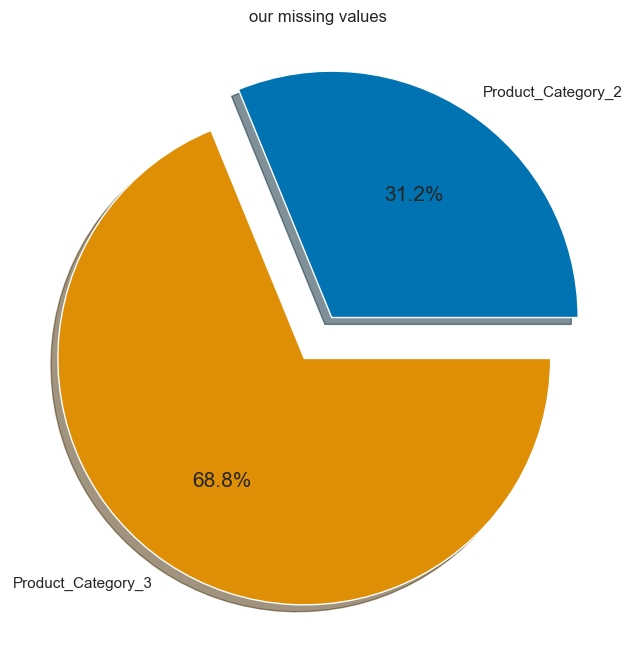

In [11]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

Only Product_Category_2 and Product_Category_3 have null values which is good news. 
However Product_Category_3 is null for nearly 70% of transactions so it can't give us much information.
so we gonna drop Product_Category_3

#### Product_Category_2

In [12]:
train.Product_Category_2.value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [13]:
train.Product_Category_2.describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [14]:
# Replace using median 
median = train['Product_Category_2'].median()
train['Product_Category_2'].fillna(median, inplace=True)

C:\Users\hari_\AppData\Local\Temp\ipykernel_23536\3144061755.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





#### Product_Category_3

In [15]:
train.Product_Category_3.value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [16]:
# drop Product_Category_3 
train=train.drop('Product_Category_3',axis=1)

In [17]:
missing_values=train.isnull().sum()
percent_missing = train.isnull().sum()/train.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing
User_ID,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0


# 3. data visualization

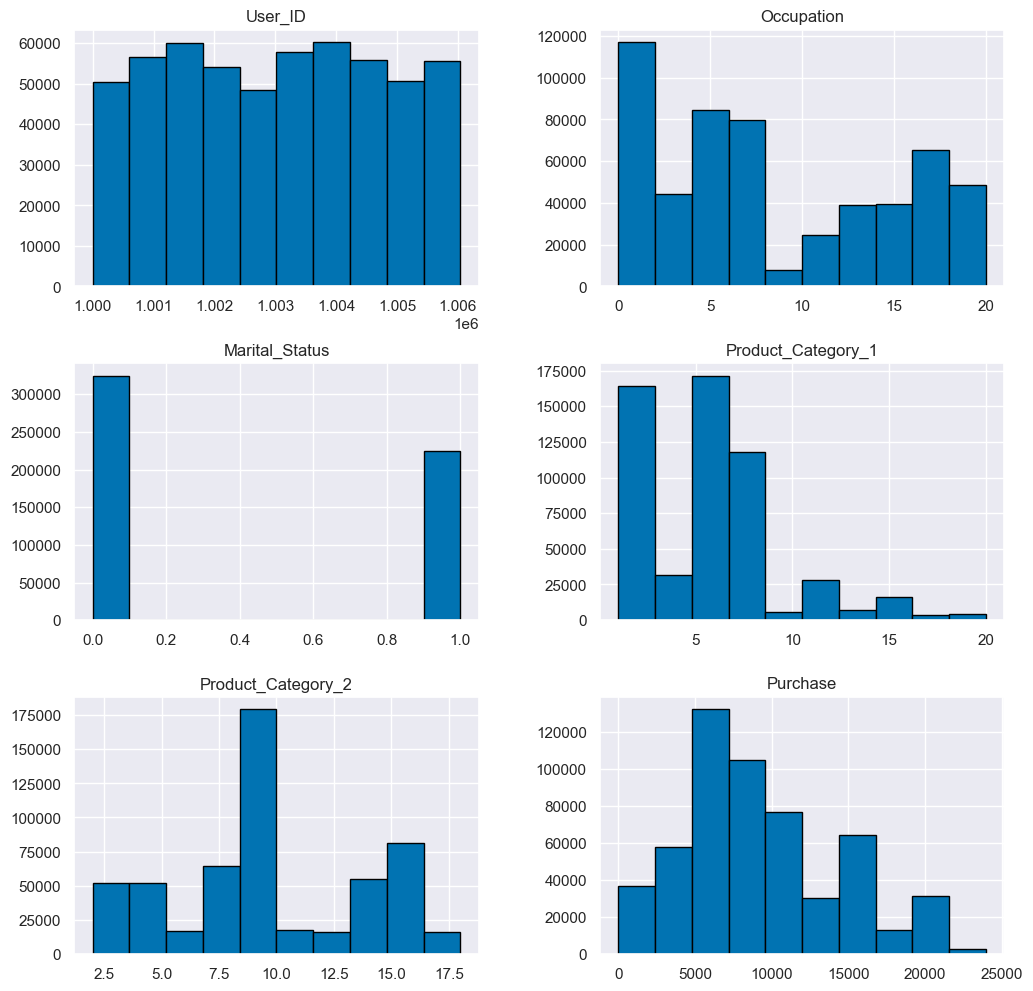

In [18]:
train.hist(edgecolor='black',figsize=(12,12));

In [19]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

### A) Gender

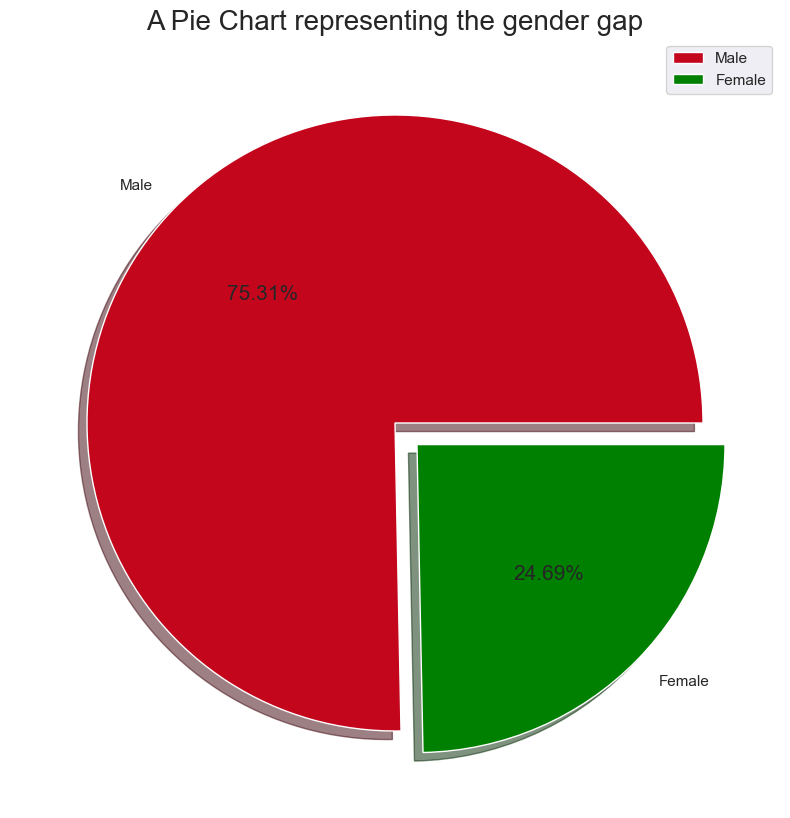

In [20]:
# pie chart 

size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

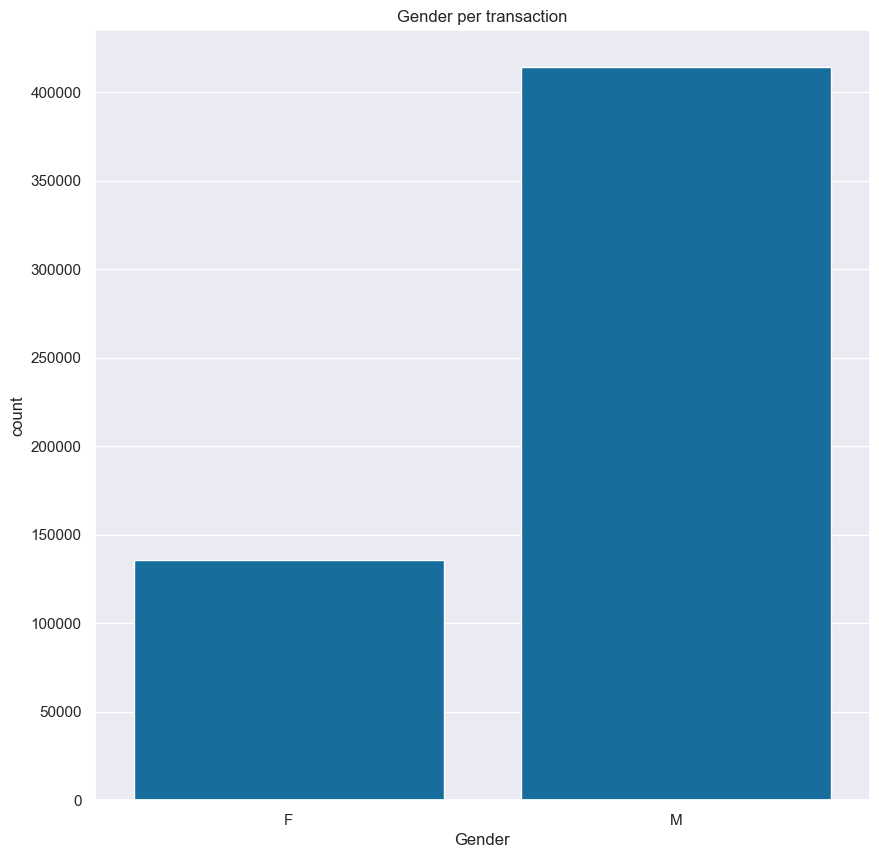

In [21]:
sns.countplot(x=train.Gender)
plt.title('Gender per transaction');

### B) Age

In [22]:
ageData = sorted(list(zip(train.Age.value_counts().index, train.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="How many products were sold",
               marker = dict(color=['black', 'yellow', 'green', 'blue', 'red', 'gray', '#C4061D'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "How many products were sold by ages")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### C) the occupation of customers

In [4]:
palette=sns.color_palette("Set2")

In [ ]:
# Taking too much time. I need to change the code.

# plt.rcParams['figure.figsize'] = (18, 9)
# sns.countplot(train['Occupation'], palette = palette)
# plt.title('Distribution of Occupation across customers', fontsize = 20)
# plt.xlabel('Occupation')
# plt.ylabel('Count')
# plt.show()

#### *Total Money Spent per Occupation*

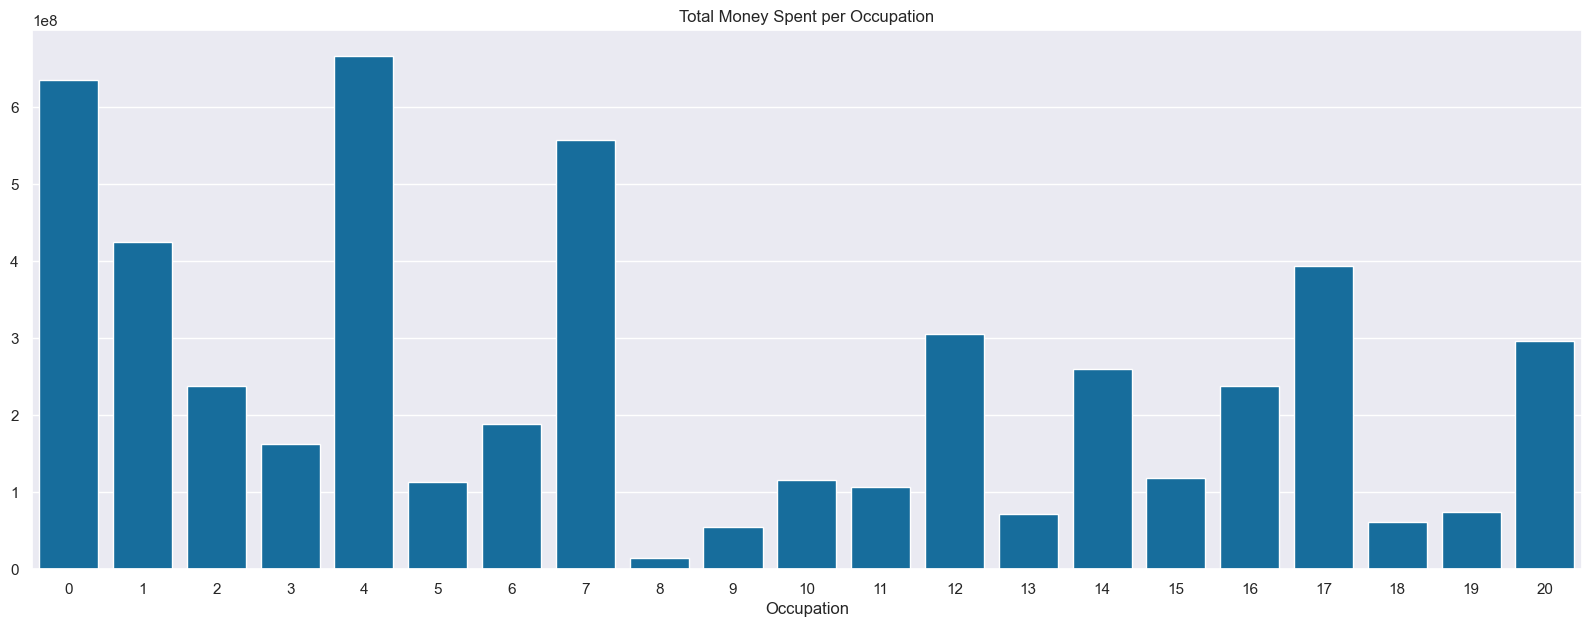

In [5]:
spent_by_occ = train.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values)
plt.title('Total Money Spent per Occupation')
plt.show()

Once again, the distribution of the mean amount spent within each occupation appears to mirror the distribution of the amount of people within each occupation. This is fortunate from a data science perspective, as we are not working with odd or outstanding features. Our data, in terms of age and occupation seems to simply make sense.

### d) City_Category

C:\Users\hari_\AppData\Local\Temp\ipykernel_24164\758125340.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hari_\AppData\Local\Temp\ipykernel_24164\758125340.py:2: UserWarning:

The palette list has more values (8) than needed (3), which may not be intended.



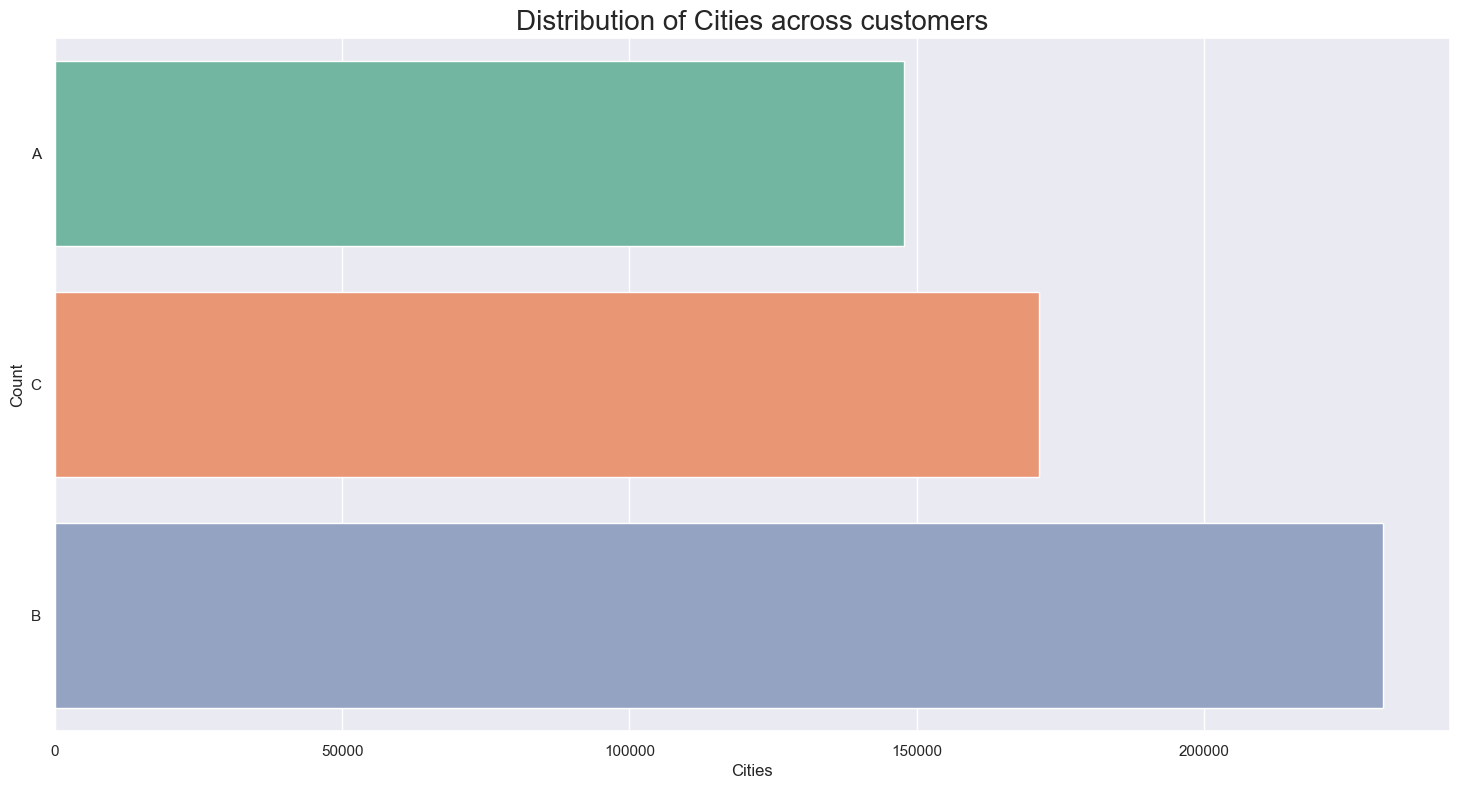

In [15]:
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(train['City_Category'], palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

### E) Products

Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

C:\Users\hari_\AppData\Local\Temp\ipykernel_24276\1734829583.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hari_\AppData\Local\Temp\ipykernel_24276\1734829583.py:4: UserWarning:


The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.



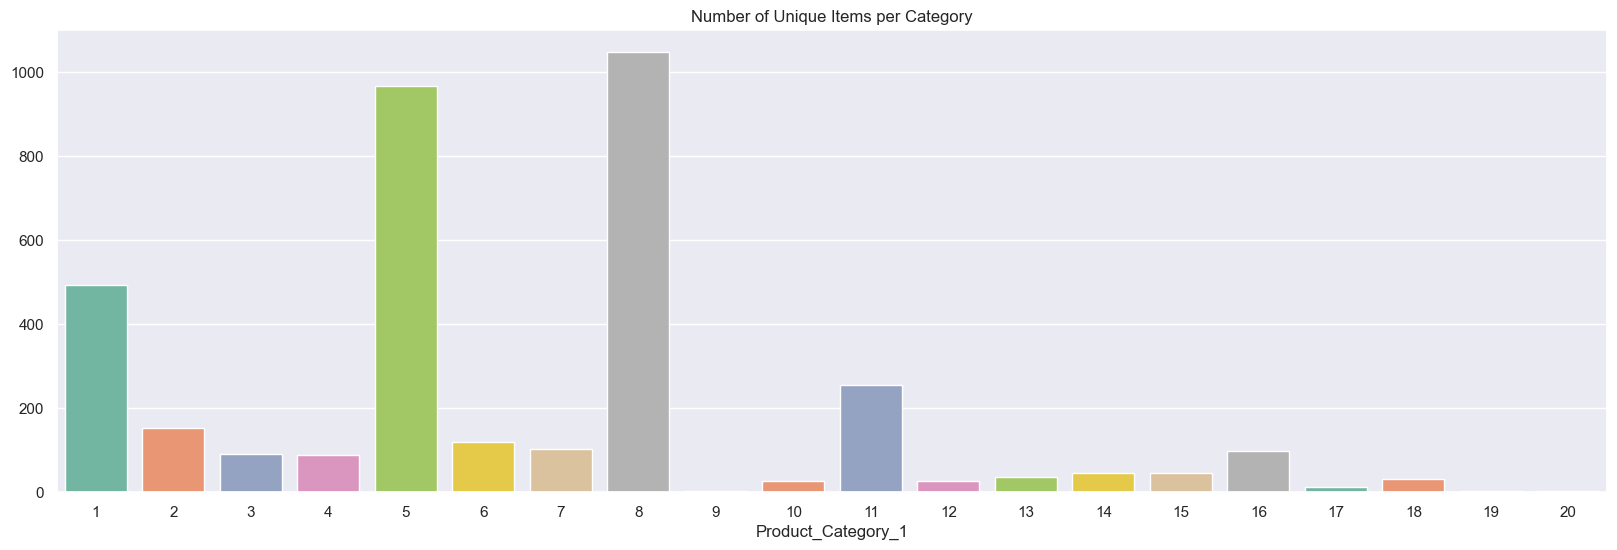

In [7]:
plt.figure(figsize=(20,6))
prod_by_cat = train.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

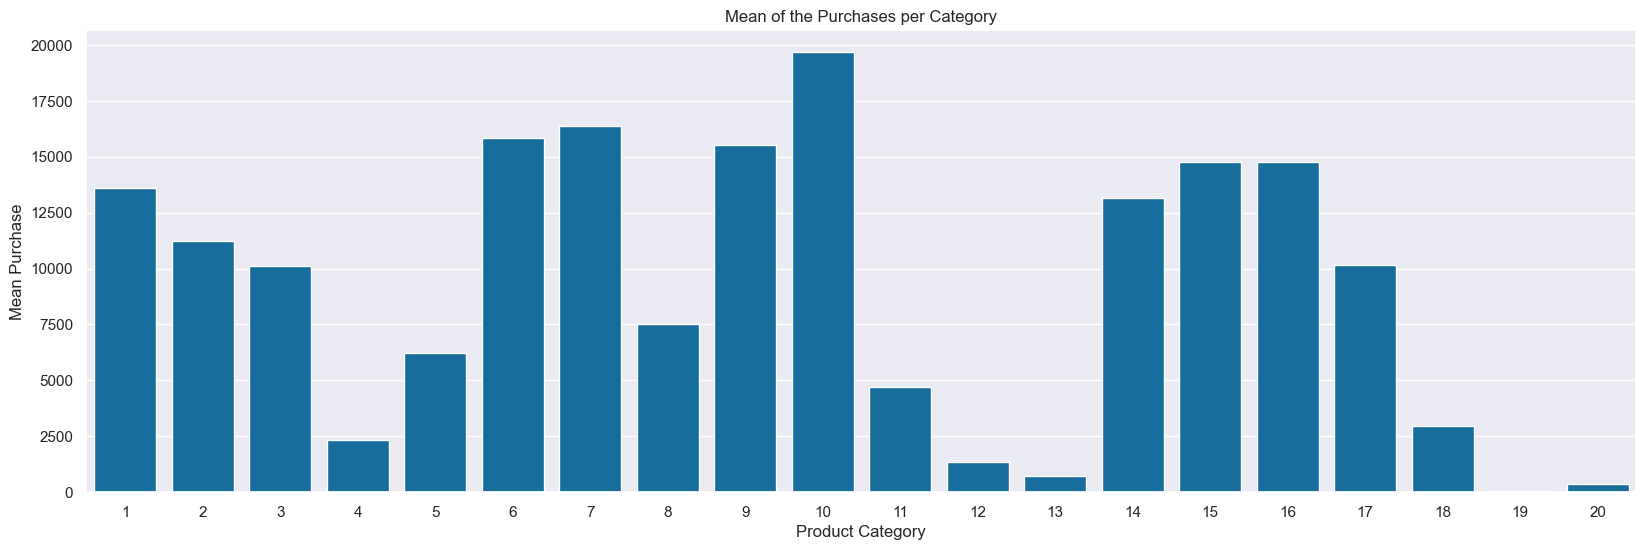

In [8]:
category = []
mean_purchase = []


for i in train['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(train[train['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(20,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

In [9]:
# visualizing the different product categories

# it is taking too much time. I need to change the code.

# plt.rcParams['figure.figsize'] = (15, 25)
# plt.style.use('ggplot')

# plt.subplot(4, 1, 1)
# sns.countplot(train['Product_Category_1'], palette = palette)
# plt.title('Product Category 1', fontsize = 20)
# plt.xlabel('Distribution of Product Category 1')
# plt.ylabel('Count')

# plt.subplot(4, 1, 2)
# sns.countplot(train['Product_Category_2'], palette = palette)
# plt.title('Product Category 2', fontsize = 20)
# plt.xlabel('Distribution of Product Category 2')
# plt.ylabel('Count')


# plt.show()

C:\Users\hari_\AppData\Local\Temp\ipykernel_24276\2416542431.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hari_\AppData\Local\Temp\ipykernel_24276\2416542431.py:7: UserWarning:


The palette list has fewer values (8) than needed (550068) and will cycle, which may produce an uninterpretable plot.



KeyboardInterrupt: 

## the purchase attribute which is our target variable

In [ ]:
# importing important libraries
from scipy import stats
from scipy.stats import norm

In [ ]:
# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(train['Purchase'], color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(train['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()


# data selection 

first we gonna drop the :
1. User_ID	
2. Product_ID

In [ ]:
train = train.drop(['Product_ID','User_ID'],axis=1)

In [ ]:
# checking the new shape of data
print(train.shape)
train

## label encoding

In [ ]:
df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final= pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

In [ ]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

In [ ]:
data_final.dtypes

### Predicting the Amount Spent

we will use one of the simplest machine learning models, i.e. the linear regression model, to predict the amount spent by the customer on Black Friday.

Linear regression represents a very simple method for supervised learning and it is an effective tool for predicting quantitative responses. You can find basic information about it right here: Linear Regression in Python

This model, like most of the supervised machine learning algorithms, makes a prediction based on the input features. The predicted output values are used for comparisons with desired outputs and an error is calculated. The error signal is propagated back through the model and model parameters are updating in a way to minimize the error. Finally, the model is considered to be fully trained if the error is small enough. This is a very basic explanation and we are going to analyze all these processes in details in future articles.

## split data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 1) LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])
print(coeff_df)

In [ ]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))